# Recommender System

importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

importing the dataset and converting it into DataFrame

In [2]:
df = pd.read_csv('D:/Data Science Stuff/Python for Data Science/3. Jupyter Overview/Refactored_Py_DS_ML_Bootcamp-master/19-Recommender-Systems/u.data', sep='\t', names= ['user_id', 'item_id', 'rating', 'timestamp'])

In [3]:
#checking first few rows of the data
df.head()
#seems like this is a tab separated data, we can use sep="\t" while reading the file

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


The data we have imported is called as the movie lens data

In [4]:
# But we don't have movie titles in it, we have it in a separate file, we will import that too..
movie_titles = pd.read_csv('D:/Data Science Stuff/Python for Data Science/3. Jupyter Overview/Refactored_Py_DS_ML_Bootcamp-master/19-Recommender-Systems/Movie_Id_Titles')
movie_titles[:5]

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


Now we will merge this movie_titles to the original dataframe based on the item_id

In [5]:
df = pd.merge(df, movie_titles, on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [6]:
df.shape

(100003, 5)

Number of unique movies present in the data

In [7]:
df['title'].nunique()

1664

now let's find the mean ratings for every movie

In [8]:
df.groupby('title')['rating'].mean().sort_values(ascending= False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

* What we did here is that, we had ratings given from individual users and recorded in a dataset. 
* So now we grouped the movies and calculated their average ratings given from all the users to a movie. 
* the data shown above might not be correct because, these might be those movies where only 1 user might have watched it rated them a 5 star

Movies with the most ratings

In [9]:
df.groupby('title')['rating'].count().sort_values(ascending= False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

* as we can see here that these are the popular movies and they have high number of reviews/ ratings from the users
* From this data we can see that these are the popular movies from the entire collection of dataset

We create a separate dataframe off average ratings from this data

In [10]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


Now let's add a column to this ratings dataframe which tells us about the number of ratings based off the title

In [11]:
ratings['num_of_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


*TIME FOR SOME EDA*

A histogram which tells us about the distribution of number of ratings

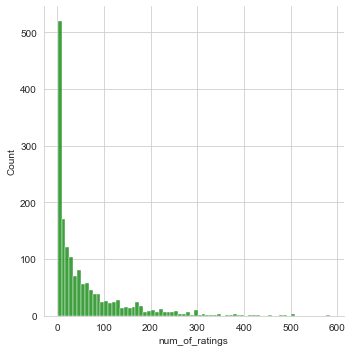

In [12]:
sns.set_style('whitegrid')
sns.displot(ratings.num_of_ratings, bins=70, color= 'green')

* Here, we can see that there are lot of movies where only one of the user has rated the movie

A histogram which tells us about the distribution of ratings 

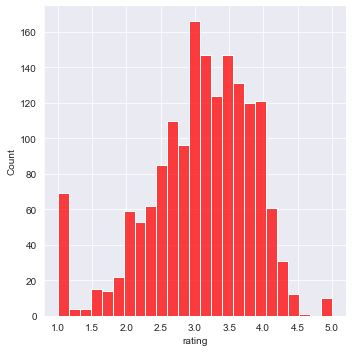

In [13]:
sns.set_style('darkgrid')
sns.displot(ratings.rating, color= 'red')

* From this visualisation, we see that the distribution is normally distributed
* Except, for the outliers at 1, which clearly states that many movies have been rated poor 
* We see another intreseting fact that the frequency of the ratings is more on whole numbered ratings which shows how the users rate the movies in the scale of 1-5

Let's have a look at bi-variate analysis between ratings and number of ratings

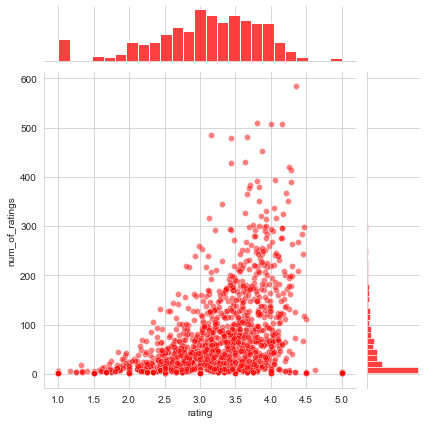

In [14]:
sns.set_style('whitegrid')
sns.jointplot(x='rating', y='num_of_ratings', data=ratings, alpha= 0.5, color='red')

* From this visualisation we can make out that, there are many number of ratings for some of the popular movies maybe
* As expected, there are few movies which are rated 5 and 1 and not many users have rated them, so we have to filter this items in the further process.

**Now building a recommendation engine based on item**

Create a matrix that has user user_Id one one axis and the movie titles on the another axis

In [15]:
movie_matrix = df.pivot_table(index='user_id', columns='title', values= 'rating')
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


we see that there are many null values present which is obvious that a single user might have not watched all the movies and have rated them.

Listing out the popular movies

In [16]:
ratings.sort_values(by='num_of_ratings', ascending= False).head()

,rating,num_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


We filter out 2 from the popular movies and compare them to the correaltion between them with other movies

In [19]:
starwars_ratings = movie_matrix['Star Wars (1977)']
liarliar_ratings = movie_matrix['Liar Liar (1997)']

Now, we group the movies which are similar to starwars

In [21]:
similar_to_starwars = movie_matrix.corrwith(starwars_ratings)
similar_to_starwars[:10]

C:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                      0.872872
1-900 (1994)                                  -0.645497
101 Dalmatians (1996)                          0.211132
12 Angry Men (1957)                            0.184289
187 (1997)                                     0.027398
2 Days in the Valley (1996)                    0.066654
20,000 Leagues Under the Sea (1954)            0.289768
2001: A Space Odyssey (1968)                   0.230884
3 Ninjas: High Noon At Mega Mountain (1998)         NaN
39 Steps, The (1935)                           0.106453
dtype: float64

In [23]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns= ['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars[:5]

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


* This tells us that how correlated this movies user ratings were to the use ratings of star wars movies.
* But there are some movies which doesn't give the result we are expecting, because there might be some users who might have watched only one movie and would have rated similar to Star wars.

In [25]:
corr_starwars.sort_values(by='Correlation', ascending= False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


So we can set a threshold/ minimum number of ratings necessary in order to consider it for our recommendation model

So we filter out the movies which has <100 num_of_rating

In [32]:
corr_starwars = corr_starwars.join(ratings.num_of_ratings)
corr_starwars.sort_values(by='Correlation', ascending= False)[:10]

,Correlation,num_of_ratings
title,,
Commandments (1997),1.0,3
Cosi (1996),1.0,4
No Escape (1994),1.0,5
Stripes (1981),1.0,5
Man of the Year (1995),1.0,9
Hollow Reed (1996),1.0,6
"Beans of Egypt, Maine, The (1994)",1.0,2
"Good Man in Africa, A (1994)",1.0,2
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0,5


In [34]:
corr_starwars[corr_starwars.num_of_ratings > 100].sort_values(by='Correlation', ascending= False)[1:10]

,Correlation,num_of_ratings
title,,
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115
L.A. Confidential (1997),0.319065,297


* So from this data we conclude saying that the user who liked Star Wars can get item based recommendation based on the above mentioned matrix.
* In other words, he is likely to get recommendations of these movies which are popular like Star Wars and are also having high correlation compared to Star Wars.